## Ejercicio de Clasificación

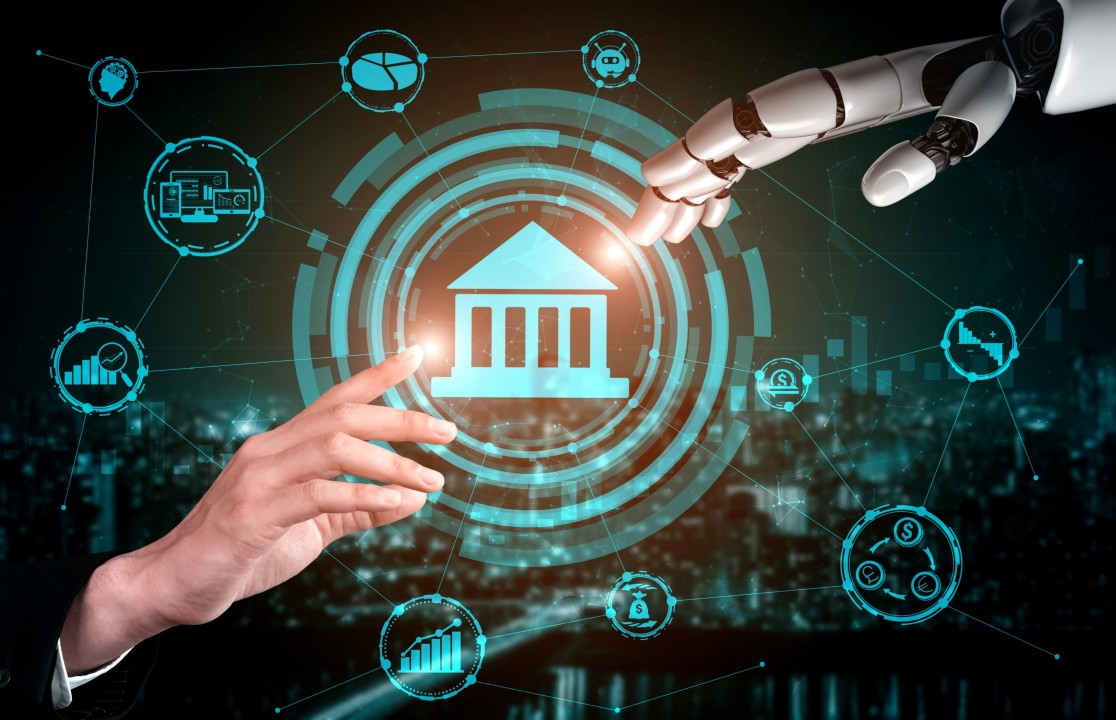

En el siguiente ejercicio se presenta un set de datos con el que trataremos de clasificar si un cliente es solvente o no a la hora de devolver un crédito solicitado a una entidad bancaria.

Para ponernos en situación pertenecemos al equipo de Data Science de una entidad bancaria y se no pide realizar un modelo que sea capaz de evaluar el riesgo de un cliente cuando nos solicita un crédito a través de una tarjeta de crédito en base al histórico de datos que os pasan desde el equipo de negocio (datos extraidos de kaggle).

A continuación os dejan una breve explicación de en que consiste cada una de las variables del conjunto de datos:

- BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- LOAN: Cantidad de solicitud de préstamo
- MORTDUE: Cantidad adeudada de la hipoteca existente
- VALUE: Valor actual del bien o propiedad
- REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar
- JOB: Categorias ocupacionales o profesionales
- YOJ: Años es esu trabajo actual
- DEROG: Número de informes derogados o cancelados importantes
- DELINQ: Número de lineas de crédito morosas
- CLAGE: Antiguedad de la linea de crédito más antigua en meses
- NINQ:Número de consultas crediticas recientes
- CLNO: Número de líneas de crédito

En este caso la target de nuestro modelo será **BAD**, el resto las consideraremos variables predictoras.

Que se espera que hagais:

- Análisis descriptivo de los datos (esto ayudará a realizar una mejor elección del modelo a usar)
- Tratamiento y limpieza de los datos
- Prueba y evaluación de diferentes modelos
- Breve explicación de los resultados, justificando la elección final del modelo (no me vale con que es el que mejor métrica tenía)
- Que disfruteis del ejercico :).

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit_risk.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [40]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [41]:
df['DEBTINC_FIXED'] = 100 - (df.VALUE/(df.LOAN + df.MORTDUE) * 100)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_FIXED
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,-44.751484
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,4.138579
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,-11.333333
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,-12.562814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,38.298760
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,35.269822
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,35.129324
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,34.464579


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BAD            5960 non-null   int64  
 1   LOAN           5960 non-null   int64  
 2   MORTDUE        5442 non-null   float64
 3   VALUE          5848 non-null   float64
 4   REASON         5708 non-null   object 
 5   JOB            5681 non-null   object 
 6   YOJ            5445 non-null   float64
 7   DEROG          5252 non-null   float64
 8   DELINQ         5380 non-null   float64
 9   CLAGE          5652 non-null   float64
 10  NINQ           5450 non-null   float64
 11  CLNO           5738 non-null   float64
 12  DEBTINC        4693 non-null   float64
 13  DEBTINC_FIXED  5357 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [36]:
df = df[(df.MORTDUE==np.nan)&(df.VALUE ==np.nan)]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BAD            0 non-null      int64  
 1   LOAN           0 non-null      int64  
 2   MORTDUE        0 non-null      float64
 3   VALUE          0 non-null      float64
 4   REASON         0 non-null      object 
 5   JOB            0 non-null      object 
 6   YOJ            0 non-null      float64
 7   DEROG          0 non-null      float64
 8   DELINQ         0 non-null      float64
 9   CLAGE          0 non-null      float64
 10  NINQ           0 non-null      float64
 11  CLNO           0 non-null      float64
 12  DEBTINC        0 non-null      float64
 13  DEBTINC_FIXED  0 non-null      float64
dtypes: float64(10), int64(2), object(2)
memory usage: 0.0+ bytes


In [8]:
df = df[~df.DEBTINC.isna()]

In [10]:
import seaborn as sns

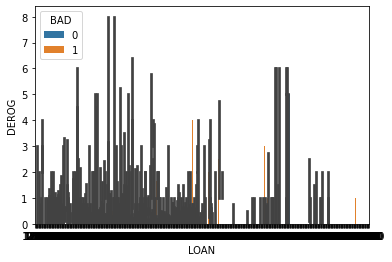

In [29]:
sns.barplot(data=df, x='LOAN', y='DEROG', hue='BAD');